In [14]:
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [11]:
df = pd.read_csv("metadata.csv")
df.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Vertices,AverageSize,DiagonalSize,Cells
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2.483000e+03,2.483000e+03,2483.000000
mean,1241.000000,1241.000000,1241.000000,1241.000000,5609.783327,5.735999e+04,2.055363e+05,10691.525977
std,716.924682,716.924682,716.924682,716.924682,9851.159563,2.857743e+06,1.024007e+07,16191.234208
min,0.000000,0.000000,0.000000,0.000000,16.000000,1.682475e-02,7.961316e-02,16.000000
25%,620.500000,620.500000,620.500000,620.500000,489.500000,2.526283e-01,1.116272e+00,924.000000
50%,1241.000000,1241.000000,1241.000000,1241.000000,1826.000000,3.367296e-01,1.354865e+00,3615.000000
75%,1861.500000,1861.500000,1861.500000,1861.500000,6306.500000,4.956336e-01,2.149745e+00,13363.500000
max,2482.000000,2482.000000,2482.000000,2482.000000,98256.000000,1.424005e+08,5.102597e+08,129881.000000


In [25]:
rdf = pd.DataFrame(df["Class"].value_counts())
print(rdf)

                 count
Class                 
Jet                143
Humanoid           142
Car                 89
Insect              66
PlantIndoors        65
...                ...
Monitor             20
Wheel               17
AircraftBuoyant     16
Hat                 15
Sign                15

[69 rows x 1 columns]


C:\Users\Efraim\AppData\Local\Temp\ipykernel_18008\260797058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='count', data=rdf, palette=['#1f77b4', '#ff7f0e'])
C:\Users\Efraim\AppData\Local\Temp\ipykernel_18008\260797058.py:6: UserWarning: 
The palette list has fewer values (2) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Class', y='count', data=rdf, palette=['#1f77b4', '#ff7f0e'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


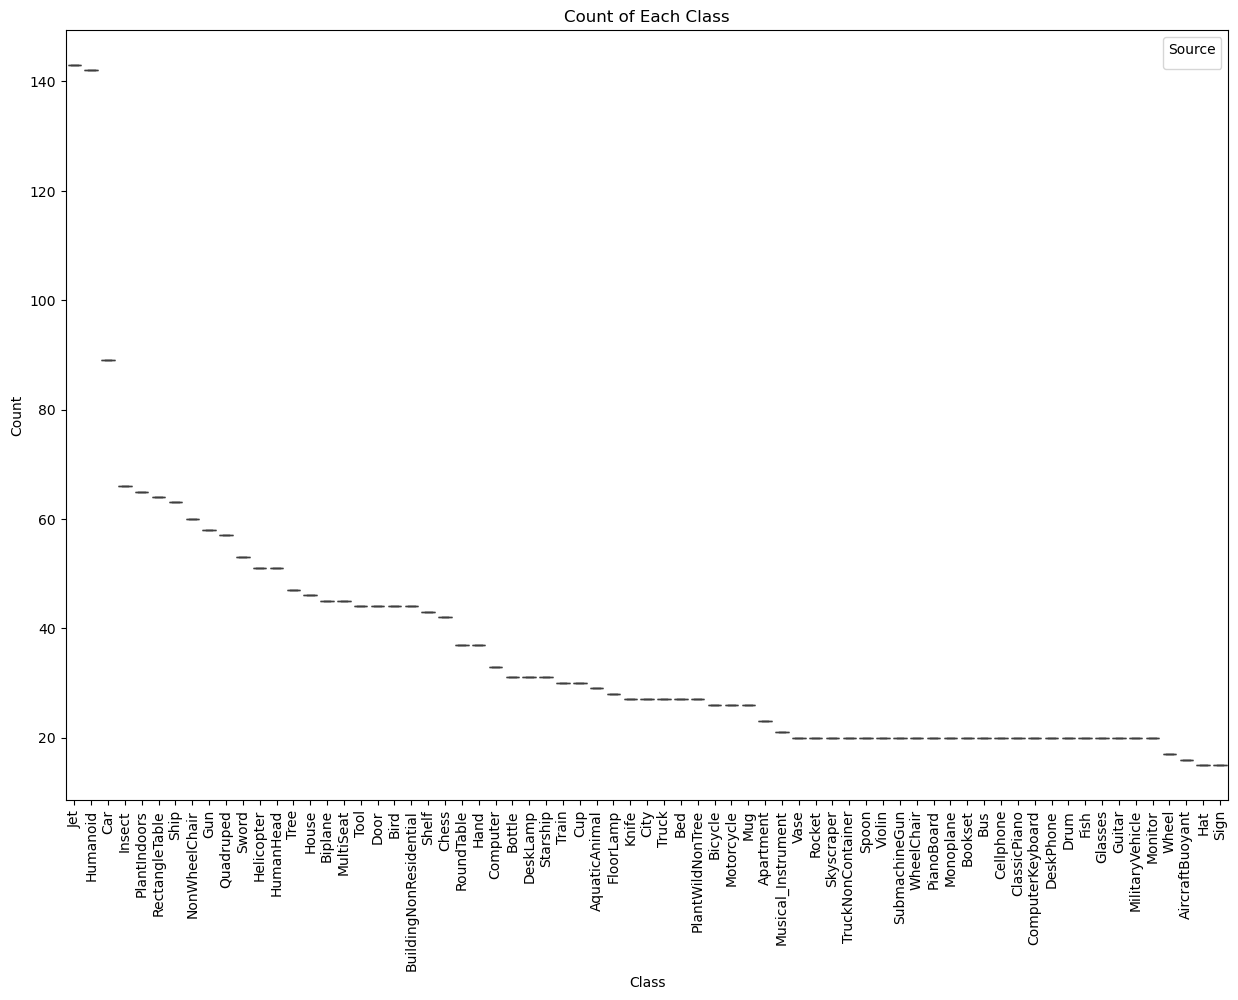

In [27]:
# Create the side-by-side boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x='Class', y='count', data=rdf, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


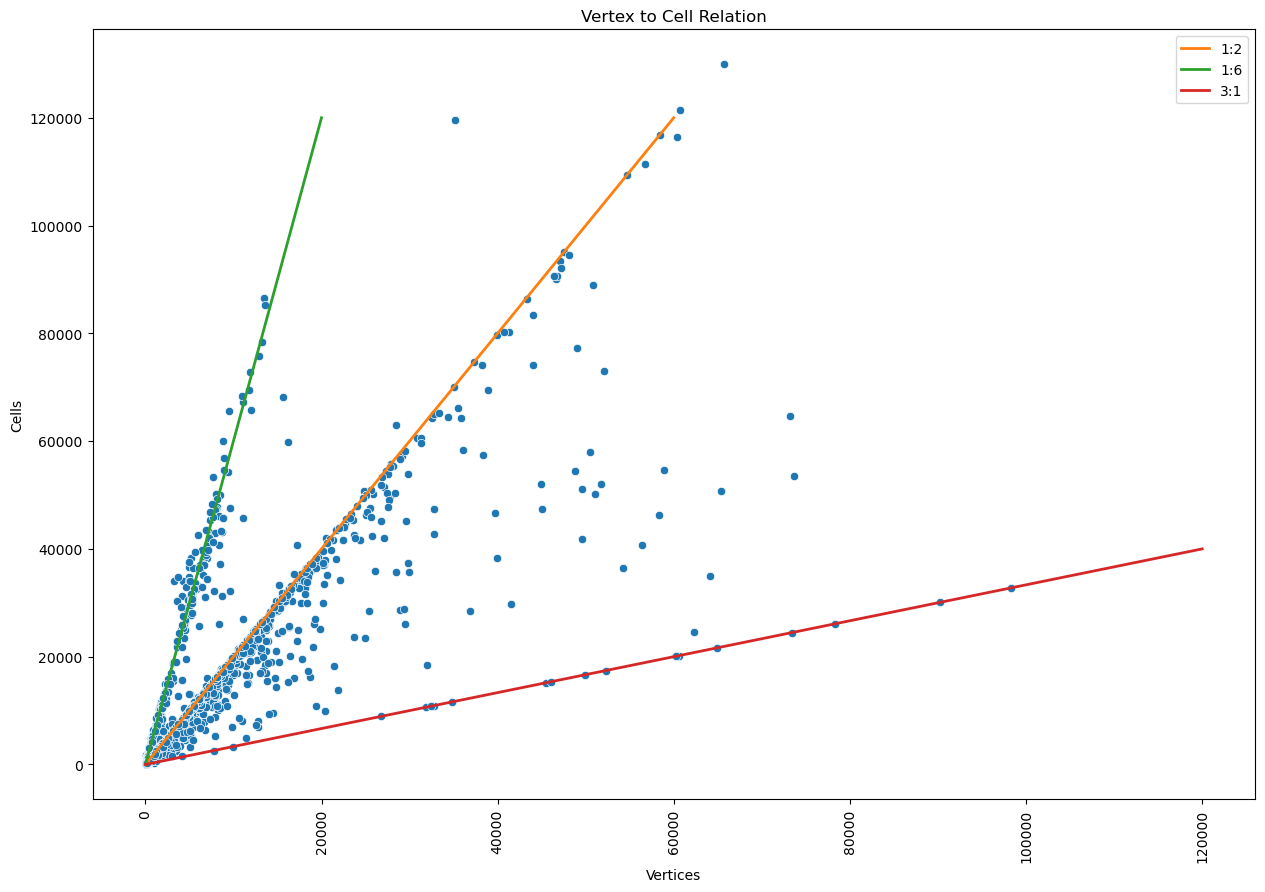

In [80]:
data = pd.DataFrame(data={"Vertices":df["Vertices"],"Cells":df["Cells"]})


plt.figure(figsize=(15, 10))
sns.scatterplot(x='Vertices', y='Cells', data=data)
plt.plot([1, 1], [120000, 120000],linewidth=2)

plt.title('Vertex to Cell Relation')
plt.xlabel('Vertices')
plt.ylabel('Cells')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.plot([0, 60000], [0, 120000], linewidth=2, label="1:2")
plt.plot([0, 20000], [0, 120000], linewidth=2, label="1:6")
plt.plot([0, 120000], [0, 40000], linewidth=2, label="3:1")

plt.legend()
plt.show()

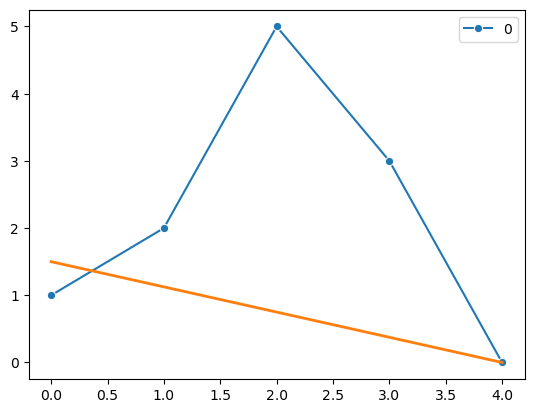

In [48]:
my_data=pd.DataFrame([1,2,5,3,0])
sns.lineplot(data = my_data,markers=True)
plt.plot([0, 0],[1, 1],linewidth=2)